In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yaml
import numpy as np
from sklearn.metrics import r2_score

from uvsw_part import simulation

In [23]:
cfg = yaml.safe_load(open('example.in.yaml', 'r'))

In [24]:
cfg

{'cable': {'type': 'None', 'length': 1.0, 'tension': 32000.0, 'h': 500.0},
 'conductor': {'m': 1.57, 'd': 0.025, 'EA': 0.0},
 'simulation': {'ns': 101,
  'tf': 4.0,
  'dt': 0.0002,
  'dr': 0.001,
  'si': 99,
  'pp': True},
 'wakeosc': {'u': 0.9,
  'st': 0.235,
  'cl0': 0.6,
  'eps': 0.3,
  'al': 0.1,
  'bt': 0.0,
  'gm': 0.0,
  'md': 1,
  'y0': 0.0,
  'q0': 0.05}}

In [25]:
data_list = pd.read_csv("C:/Users/ksour/Downloads/RTE/awakosc/uvsw_part/test/List1.txt" , delim_whitespace=True)
data_list.head()

,nc,md,U[m/s],d[m],m[kg/m],L[m],H[N],Nt,Dt[s],tf[s],ymax,[m],filename
0,1,1,0.90,0.025,1.57,1,500,18015,0.0004,7.2060,7.681950e-08,Data1.1.bin,NaN
1,2,1,0.92,0.025,1.57,1,500,100000,0.0004,40.0000,2.049360e-04,Data1.2.bin,NaN
2,3,1,0.95,0.025,1.57,1,500,38068,0.0004,15.2272,2.684940e-05,Data1.3.bin,NaN
3,4,1,0.99,0.025,1.57,1,500,26408,0.0004,10.5632,1.799240e-05,Data1.4.bin,NaN
4,5,1,1.01,0.025,1.57,1,500,42788,0.0004,17.1152,1.771030e-05,Data1.5.bin,NaN


In [26]:
data_list.describe()

,nc,md,U[m/s],d[m],m[kg/m],L[m],H[N],Nt,Dt[s],tf[s],ymax,filename
count,31.000000,31.0,31.000000,3.100000e+01,31.00,31.0,31.000000,31.000000,31.000000,31.000000,3.100000e+01,0.0
mean,16.000000,1.0,3.462742,2.500000e-02,1.57,1.0,9451.612903,55537.935484,0.000277,16.086142,7.605330e-04,NaN
std,9.092121,0.0,2.339821,1.058039e-17,0.00,0.0,11622.072993,24297.548616,0.000126,12.729271,5.788313e-04,NaN
min,1.000000,1.0,0.900000,2.500000e-02,1.57,1.0,500.000000,10000.000000,0.000100,4.000000,7.681950e-08,NaN
25%,8.500000,1.0,1.895000,2.500000e-02,1.57,1.0,2000.000000,50000.000000,0.000200,8.603000,2.672550e-04,NaN
50%,16.000000,1.0,3.750000,2.500000e-02,1.57,1.0,8000.000000,50000.000000,0.000200,10.000000,6.324810e-04,NaN
75%,23.500000,1.0,3.842500,2.500000e-02,1.57,1.0,8000.000000,50000.000000,0.000400,20.000000,1.148610e-03,NaN
max,31.000000,1.0,7.750000,2.500000e-02,1.57,1.0,32000.000000,100000.000000,0.000400,40.000000,1.863200e-03,NaN


In [27]:
set_params = data_list.iloc[25,:]

In [28]:
cfg.keys()

dict_keys(['cable', 'conductor', 'simulation', 'wakeosc'])

In [29]:
cfg["cable"]["tension"] = np.float(set_params["H[N]"])
cfg["cable"]["length"] = np.float(set_params["L[m]"])
cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
cfg["simulation"]["dt"] = float(set_params["Dt[s]"])
cfg["wakeosc"]["md"] = np.float(set_params["md"])


In [30]:
cfg

{'cable': {'type': 'None', 'length': 1.0, 'tension': 32000.0, 'h': 500.0},
 'conductor': {'m': 1.57, 'd': 0.025, 'EA': 0.0},
 'simulation': {'ns': 101,
  'tf': 5.0,
  'dt': 0.0001,
  'dr': 0.001,
  'si': 99,
  'pp': True},
 'wakeosc': {'u': 7.58,
  'st': 0.235,
  'cl0': 0.6,
  'eps': 0.3,
  'al': 0.1,
  'bt': 0.0,
  'gm': 0.0,
  'md': 1.0,
  'y0': 0.0,
  'q0': 0.05}}

# <center>Simulation avec H_list</center>

################ h value: 100 ################
u value:  2.15  tf value:  13.3264


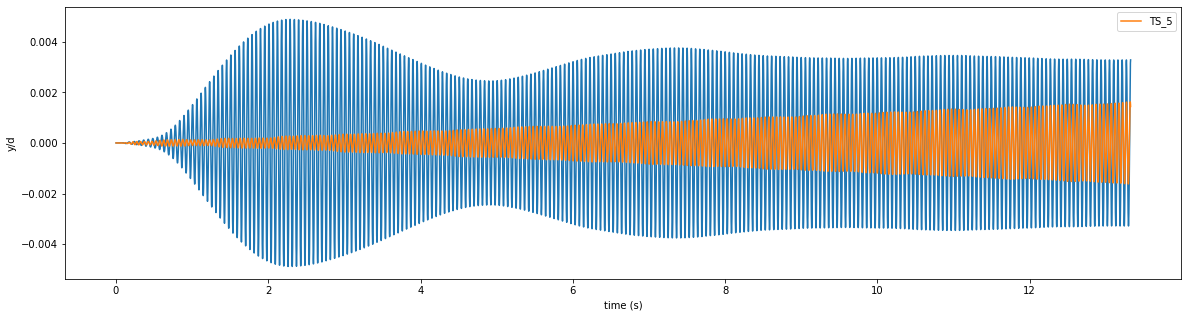

################ h value: 1000 ################
u value:  2.15  tf value:  13.3264
 -- running 52.99%

In [ ]:
set_params = data_list.iloc[14,:]
#tension_list = [32100, 32200, 32300, 32400]
h_list = [100, 1000, 5000, 10000]
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

if __name__ == '__main__':
    for h_value in h_list: 
        print("################ h value: {} ################".format(h_value))
        cfg = yaml.safe_load(open('example.in.yaml', 'r'))
       
        cfg["cable"]["tension"] = 32100.
        cfg["cable"]["h"] = np.float(h_value)
        cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
        
        cfg["wakeosc"]["u"] = 2.15
        
        
      
        print("u value: ", cfg["wakeosc"]["u"], " tf value: ", cfg["simulation"]["tf"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])

        dfy, _ = simulation.run_cable_wakeosc(cfg)

        #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
              
        plt.figure(figsize = (20,5))
        plt.plot(ref['time'], ref['y/d'])
        plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "TS_5")
        plt.xlabel('time (s)')
        plt.ylabel('y/d')
        plt.legend()
        plt.savefig('image_simul/TS15/H='+str(h_value)+'.png')
       
        plt.show()
        

# <center>Simulation avec T_list</center>

In [ ]:
set_params = data_list.iloc[14,:]
#tension_list = [32100, 32200, 32300, 32400]
T_list = [10000, 20000, 30000, 60000]
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

if __name__ == '__main__':
    for T_value in T_list: 
        print("################ T value: {} ################".format(T_value))
        cfg = yaml.safe_load(open('example.in.yaml', 'r'))
       
        cfg["wakeosc"]["u"] = 0.5
        cfg["cable"]["h"] = 100.
        cfg["cable"]["tension"] = np.float(T_value)
        cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
        
        
        
      
        print("u value: ", cfg["wakeosc"]["u"], " tf value: ", cfg["simulation"]["tf"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])

        dfy, _ = simulation.run_cable_wakeosc(cfg)

        #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
              
        plt.figure(figsize = (20,5))
        plt.plot(ref['time'], ref['y/d'])
        plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "TS_15")
        plt.xlabel('time (s)')
        plt.ylabel('y/d')
        plt.legend()
        plt.savefig('image_simul/TS15/T='+str(T_value)+'.png')
       
        plt.show()

# <center>Simulation avec U_list</center>

In [ ]:
set_params = data_list.iloc[14,:]
U_list = [0.5, 1.5, 2.5, 3.5, 4.5]
ref = pd.read_csv("graph{}.csv".format(set_params["nc"]))

if __name__ == '__main__':
    for U_value in U_list: 
        print("################ U value: {} ################".format(U_value))
        cfg = yaml.safe_load(open('example.in.yaml', 'r'))
       
        cfg["cable"]["h"] = 100.
        cfg["cable"]["tension"] = 32100.
        cfg["Simulation"]["u"] = np.float(U_value)
        cfg["simulation"]["tf"] = np.float(set_params["tf[s]"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])
        
        
        
      
        print("u value: ", cfg["wakeosc"]["u"], " tf value: ", cfg["simulation"]["tf"])
        #cfg["wakeosc"]["u"] = np.float(set_params["U[m/s]"])

        dfy, _ = simulation.run_cable_wakeosc(cfg)

        #print(r2_score(ref['y/d'],simulation['y/d'][:-1]))
              
        plt.figure(figsize = (20,5))
        plt.plot(ref['time'], ref['y/d'])
        plt.plot(dfy.index, dfy['s=0.250']/0.025, label = "TS_15")
        plt.xlabel('time (s)')
        plt.ylabel('y/d')
        
        plt.legend()
        plt.savefig('image_simul/TS15/U='+str(U_value)+'.png')
       
        plt.show()